In [1]:
pip install pandas matplotlib wordcloud scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('twitter_training.csv', encoding='utf-8')


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Category   74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [21]:
dataset.head()

,ID,Category,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [22]:
dataset.describe()

,ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [32]:
dataset.isnull().sum()

ID             0
Category       0
Sentiment      0
Text         686
dtype: int64

In [11]:
# Rename columns for clarity
dataset.columns = ['ID', 'Category', 'Sentiment', 'Text']

# Check unique values in 'Category' and 'Sentiment' and missing data patterns
category_unique = dataset['Category'].unique()
sentiment_unique = dataset['Sentiment'].unique()
missing_data = dataset.isnull().sum()

category_unique, sentiment_unique, missing_data


(array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
        'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
        'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
        'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
        'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
        'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
        'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
        'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
        'TomClancysGhostRecon', 'Nvidia'], dtype=object),
 array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object),
 ID             0
 Category       0
 Sentiment      0
 Text         686
 dtype: int64)

In [3]:
# Drop rows with missing Text
dataset_cleaned = dataset.dropna(subset=['Text'])

# Check the sentiment distribution
print(dataset_cleaned['Sentiment'].value_counts())

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


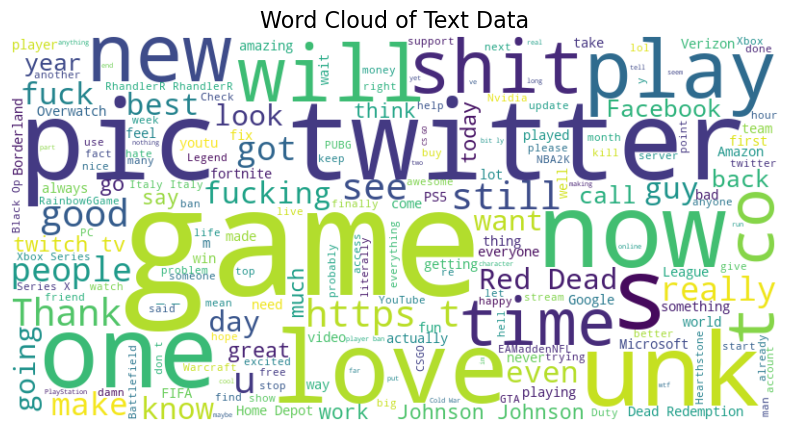

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text
text_combined = " ".join(dataset_cleaned['Text'].values)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()


C:\Users\krishna rohit\AppData\Local\Temp\ipykernel_20496\2011972417.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')


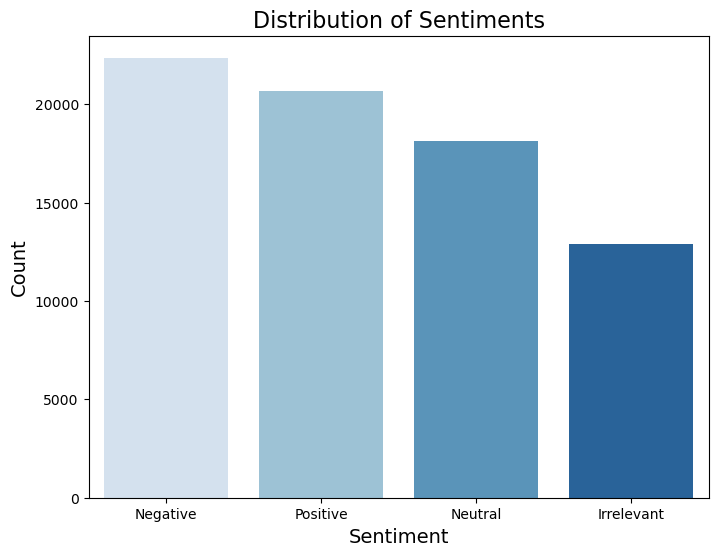

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sentiment_counts = dataset_cleaned['Sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')

# Adding titles and labels
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the chart
plt.show()


In [19]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
dataset = pd.read_csv('twitter_training.csv', encoding='utf-8')

# Rename columns for clarity
dataset.columns = ['ID', 'Category', 'Sentiment', 'Text']

# Step 1: Drop rows with missing Text and create a copy to avoid warnings
dataset_cleaned = dataset.dropna(subset=['Text']).copy()

# Step 2: Define a text preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(filtered_words)

# Step 3: Apply preprocessing function to the Text column
dataset_cleaned['Cleaned_Text'] = dataset_cleaned['Text'].apply(preprocess_text)

# Display the first few rows of the cleaned dataset
print(dataset_cleaned.head())


[nltk_data] Downloading package stopwords to C:\Users\krishna
[nltk_data]     rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\krishna
[nltk_data]     rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ID     Category Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                    Cleaned_Text  
0            coming borders kill  
1    im getting borderlands kill  
2   im coming borderlands murder  
3  im getting borderlands murder  
4  im getting borderlands murder  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Vectorize text data
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(dataset_cleaned['Cleaned_Text']).toarray()

# Target variable
y = dataset_cleaned['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6388945198999932

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.62      0.49      0.55      2624
    Negative       0.65      0.74      0.70      4463
     Neutral       0.65      0.52      0.58      3589
    Positive       0.62      0.72      0.67      4123

    accuracy                           0.64     14799
   macro avg       0.64      0.62      0.62     14799
weighted avg       0.64      0.64      0.63     14799



In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Vectorize the text
vectorizer = CountVectorizer(max_features=5000)  # Use up to 5000 most frequent words
X = vectorizer.fit_transform(dataset_cleaned['Cleaned_Text']).toarray()

# Step 2: Define the target variable (sentiment)
y = dataset_cleaned['Sentiment']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (59196, 5000), Testing set size: (14799, 5000)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the model
model = MultinomialNB()

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6388945198999932

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.62      0.49      0.55      2624
    Negative       0.65      0.74      0.70      4463
     Neutral       0.65      0.52      0.58      3589
    Positive       0.62      0.72      0.67      4123

    accuracy                           0.64     14799
   macro avg       0.64      0.62      0.62     14799
weighted avg       0.64      0.64      0.63     14799



In [34]:
#testing the random tweets from the dataset
tweets = [
    "I will kill you !",
    "All the Borderlands are fuckin trash.",
    "I love these new @ GhostLifestyle cans!! Everyone else drinks ghost?...."
]

for tweet in tweets:
    sentiment = predict_sentiment(tweet, vectorizer, model)
    print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment}\n")


Tweet: I will kill you !
Predicted Sentiment: Neutral

Tweet: All the Borderlands are fuckin trash.
Predicted Sentiment: Negative

Tweet: I love these new @ GhostLifestyle cans!! Everyone else drinks ghost?....
Predicted Sentiment: Irrelevant



<Axes: xlabel='Sentiment'>

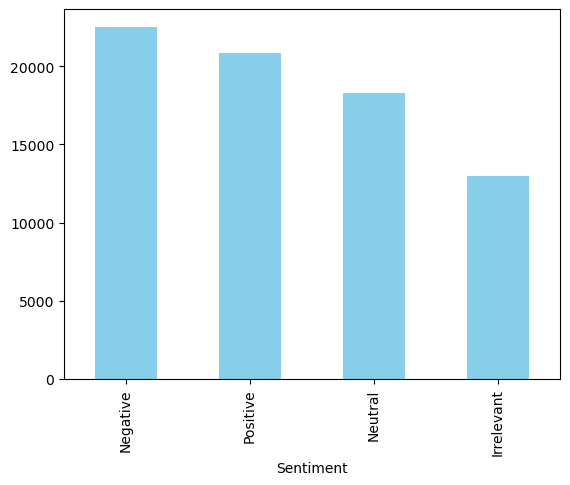